In [1]:
import os
import pandas as pd

In [2]:
parent_dir = r"C:\Users\jarry\Documents\Python Scripts\Teraco Coding Production\All Teraco Data"

sites = ["CT1", "CT2", "DB1", "JB1 East", "JB1 West", "JB2", "JB3"]
subfolders = ["Operations " + site for site in sites]

sub_dir = [os.path.join(parent_dir, subfolder) for subfolder in subfolders]

names_list = [os.path.join(sub, "Name_list.csv") for sub in sub_dir]
masters_list = [os.path.join(sub, "Data", "Master.csv") for sub in sub_dir]
outputs_list = [os.path.join(sub, "Outputs", "Data Analysis Results.xlsx") for sub in sub_dir]

In [3]:
names_list, masters_list, outputs_list

(['C:\\Users\\jarry\\Documents\\Python Scripts\\Teraco Coding Production\\All Teraco Data\\Operations CT1\\Name_list.csv',
  'C:\\Users\\jarry\\Documents\\Python Scripts\\Teraco Coding Production\\All Teraco Data\\Operations CT2\\Name_list.csv',
  'C:\\Users\\jarry\\Documents\\Python Scripts\\Teraco Coding Production\\All Teraco Data\\Operations DB1\\Name_list.csv',
  'C:\\Users\\jarry\\Documents\\Python Scripts\\Teraco Coding Production\\All Teraco Data\\Operations JB1 East\\Name_list.csv',
  'C:\\Users\\jarry\\Documents\\Python Scripts\\Teraco Coding Production\\All Teraco Data\\Operations JB1 West\\Name_list.csv',
  'C:\\Users\\jarry\\Documents\\Python Scripts\\Teraco Coding Production\\All Teraco Data\\Operations JB2\\Name_list.csv',
  'C:\\Users\\jarry\\Documents\\Python Scripts\\Teraco Coding Production\\All Teraco Data\\Operations JB3\\Name_list.csv'],
 ['C:\\Users\\jarry\\Documents\\Python Scripts\\Teraco Coding Production\\All Teraco Data\\Operations CT1\\Data\\Master.csv',
  

In [4]:
all_frames = []

for site, name_dir, master_dir, output_dir in zip(sites, names_list, masters_list, outputs_list):
    
    new_frame = pd.DataFrame()
    
    try:
        name_list = pd.read_csv(name_dir)
        name_list["Energy Flow"]
    except:
        name_list = pd.read_csv(name_dir, delimiter = ";")
        
    
    try:
        master = pd.read_csv(master_dir, index_col = "Timestamp", parse_dates = True)
    except:
        master = pd.read_csv(master_dir, delimiter = ";", index_col = "Timestamp", parse_dates = True)
        
#     try:
    output = pd.read_excel(output_dir, sheet_name = "Plotting Data", index_col = "Timestamp", parse_dates = True)
#     except:
#         output = pd.read_excel(output_dir, delimiter = ";", sheet_name = "Plotting Data", index_col = "Timestamp", parse_dates = True)

    new_frame["Total Incoming"] = output[output["TEM"]=="Total"]["Total Incoming Power"]
    new_frame["Total HVAC"] = output[output["TEM"]=="Total"]["Actual HVAC Power kWh"]
    new_frame["Total UPS"] = output[output["TEM"]=="Total"]["Total UPS Power"]
    new_frame["Predicted HVAC"] = output[output["TEM"] == "Total"]["Predicted HVAC Power kWh"]
    
#     new_frame["Predicted HVAC Power kWh"] = 0
    
    new_frame["Site"] = site
    
    all_frames.append(new_frame)
    
combined_frame = pd.concat(all_frames)

# combined_frame.to_excel(os.path.join(parent_dir, "Overall View", "All Data.xlsx"))

<AxesSubplot:xlabel='Timestamp'>

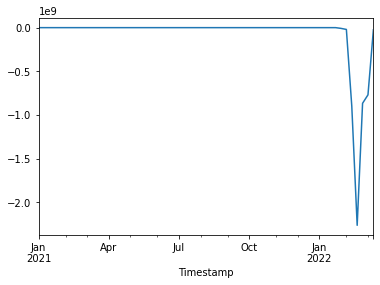

In [5]:
combined_frame[combined_frame["Site"] == "JB3"]["Predicted HVAC"].plot()

In [6]:
new_frame = pd.DataFrame()

total_frame = pd.concat(all_frames, axis = 1)

new_frame["Total Incoming"] = total_frame["Total Incoming"].sum(axis = 1)
new_frame["Total HVAC"] = total_frame["Total HVAC"].sum(axis = 1)
new_frame["Total UPS"] = total_frame["Total UPS"].sum(axis = 1)
new_frame["Predicted HVAC"] = total_frame["Predicted HVAC"].sum(axis = 1)

new_frame["Site"] = "Total"

combined_frame = pd.concat([combined_frame, new_frame])

In [7]:
combined_frame.to_excel(os.path.join(parent_dir, "Overall View", "All Data.xlsx"))

<AxesSubplot:xlabel='Timestamp'>

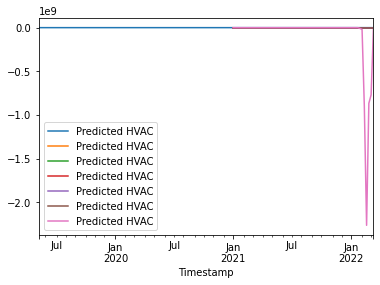

In [8]:
total_frame["Predicted HVAC"].plot()

<AxesSubplot:xlabel='Timestamp'>

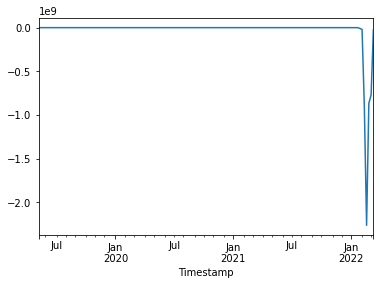

In [9]:
total_frame["Predicted HVAC"].sum(axis = 1).plot()

<AxesSubplot:xlabel='Timestamp'>

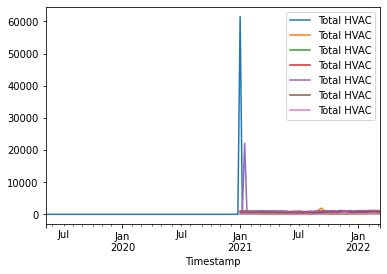

In [10]:
total_frame["Total HVAC"].plot()

<AxesSubplot:xlabel='Timestamp'>

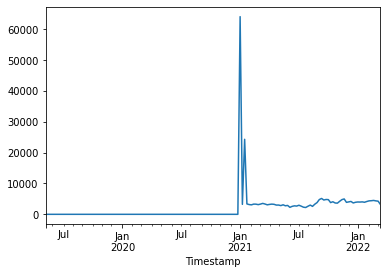

In [11]:
total_frame["Total HVAC"].sum(axis = 1).plot()